In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#векторный формат
%config InlineBackend.figure_format = 'svg'

# Инфляция

In [3]:
Inflation = pd.read_csv('https://www.statbureau.org/ru/russia/inflation-tables/inflation.monthly.csv')

In [4]:
Inflation.tail()

,﻿Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего
24,2015,3.85,2.22,1.21,0.46,0.35,0.19,0.80,0.35,0.57,0.74,0.75,0.77,12.91
25,2016,0.96,0.63,0.46,0.44,0.41,0.36,0.54,0.01,0.17,0.43,0.44,0.40,5.38
26,2017,0.62,0.22,0.13,0.33,0.37,0.61,0.07,-0.54,-0.15,0.20,0.22,0.42,2.52
27,2018,0.31,0.21,0.29,0.38,0.38,0.49,0.27,0.01,0.16,0.35,0.50,0.84,4.27
28,2019,1.01,0.44,0.32,0.29,0.34,0.04,0.20,-0.24,-0.16,0.13,0.28,NaN,2.68


# Ticker

## 1. Прогружаем данные

In [5]:
from datetime import datetime

In [6]:
Ticker = pd.read_csv('Data/BTC-USD.csv', index_col='Date', parse_dates=True)

In [7]:
Ticker.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-01,465.864014,468.174011,372.239990,386.944000,386.944000,410881000
2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300


## 2. Смотрим динамику курса

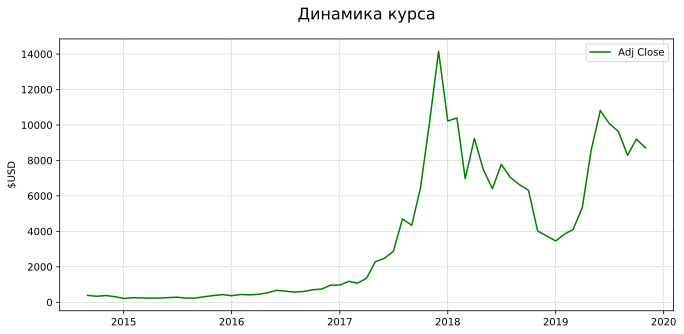

In [8]:
figure(figsize=(11,5))
dif = 0
#dif = Ticker['Close'].values[0] - Ticker['Adj Close'].values[0]
plt.plot(Ticker['Adj Close']+(dif), color='green', marker='', linestyle='-', markerfacecolor='blue', label = 'Adj Close');
plt.grid(linestyle='--', linewidth=0.5)


#plt.legend(loc='upper center', ncol=2);
plt.legend(loc='best');        


#Подписи для осей:
#plt.xlabel('time', fontsize=10)
plt.ylabel('$USD', fontsize=10);


#Диапазон осей:
#plt.xlim('1950-01-01', '2020-01-01');
#plt.ylim(0, 3000);

# Градуировка осей
#plt.yticks(range(0, 3200, 500), fontsize=12)


#Заголовок:
plt.title('Динамика курса', fontsize=16, y=1.05);


## 3. Доходность

Доходность (Rate of Return) – это относительный прирост стоимости актива в каждом из периодов по отношению к предыдущему значению:
$$
ROR(t_i) = \frac{Close(t_i)}{Close(t_{i-1})} - 1 , \ i = 1,\ldots,n
$$

In [9]:
close = Ticker['Adj Close'].values.copy()
ror = np.diff(close) / close[:-1]

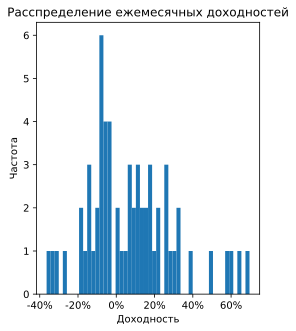

In [10]:
num_bins = 50

fig, ax = plt.subplots(1, 1, figsize=(4, 5))

# the histogram of the data
n, bins, patches = ax.hist(ror*100, num_bins, normed=0)

ax.set_xlabel('Доходность')
ax.set_ylabel('Частота')
ax.set_title('Расспределение ежемесячных доходностей');
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))



### 3.1 Накопленная доходность

Накопленная доходность (Accumulated Rate of Return) – это итоговая доходность актива за определенный промежуток времени. С точки зрения математики накопленная доходность - кумулятивное произведение доходностей от начальной до текущей за каждый из периодов:
$$
AROR(t_i) = \left( \prod_{j=1}^i \left( ROR(t_j) + 1 \right) \right) - 1, \ i = 1,\ldots,n
$$
Вектор aror вычисляется в Python так:

In [11]:
aror = (ror + 1.).cumprod() - 1.

### 3.2 Среднегодовая доходность

Среднегодовая доходность (Compound Annual Growth Rate) – это усреднённая доходность (среднее геометрическое) на выбранном периоде:
$$
CAGR(t_1, t_i) = \left( \frac{AROR(t_i) + 1}{AROR(t_1) + 1} \right)^{\frac1{t_i - t_1}} - 1, \ i = 1,\ldots,n
$$
Обратим внимание на то, что t_i - t_1 не обязательно целое число. Термин CAGR удобно использовать, так как он довольно часто используется в мире финансов - Compound annual growth rate и позволяет отличить среднегодовую доходность от, например, матожидания доходности.

Вычислим в Python значение CAGR для всего периода:

In [12]:
years_total = aror.size / 12
cagr = ((aror[-1] + 1.)/(aror[0] + 1.)) ** (1 / years_total) - 1.
print('Среднегодовая доходность = ', round(cagr*100, 2),'%') 

Среднегодовая доходность =  87.51 %


## 4. Риск

Мы различаем два типа риска: месячный и приведённый к году. Приведенное к году значение наиболее важно, так как зачастую является главным итогом вычислений и важным параметром для конкретного актива. Приведенным этот параметр называется потому, что является расчётным. Его значение вычисляется и приводится к году, исходя из месячных показателей портфеля (риск и доходность).

Месячный риск равен стандартному отклонению месячных значений доходности:
$$ Risk_{monthly} = \sqrt{\frac{\sum_{i=1}^{n}\left(ROR(t_i)-{\overline{ROR}}\right)^{2}}{n-1}}, \ i = 1,\ldots,n $$
где
$$ \overline{ROR} = \frac{\sum_{i=1}^n ROR(t_i) }{n} $$
Риск, приведённый к году вычисляется по формуле:
$$ Risk_{yearly} = \sqrt{\left(Risk_{monthly}^2 + \overline{ROR}^2\right)^{12} - \overline{ROR}^{24}} $$
Важно отметить, что формула не ограничивает длину вектора ROR. Но на практике Global Investment Performance Standards (GIPS) не рекомендует приводить к году данные для периодов меньше года. Именно поэтому мы в начале статьи указали на необходимость загрузки минимально 13 значений данных закрытия. Это дает возможность получить приведенные к году значения риска и доходности (CAGR). 

Соответствующие значения в Python вычисляются так:

In [13]:
risk_monthly = ror.std()
ror_mean = (1. + ror).mean()
risk_yearly = np.sqrt((risk_monthly**2 + ror_mean**2)**12 - ror_mean**24)

print('СКО = ', round(risk_yearly*100, 2), '%')

СКО =  201.12 %


## 5. Инфляция

Инфляция - это изменение показателя индекса потребительских цен (обозначаем как CPI_Rate) за промежуток времени в процентах.

Общепринятым подходом для вычисления средней инфляции за промежуток времени является среднее геометрическое (так же как и для доходности). Но математический смысл имеет и среднее арифметическое - математическое ожидание инфляции. Мы вычисляем три значения на основе данных индекса потребительских цен: математическое ожидание инфляции (среднее арифметическое), средняя инфляция (среднее геометрическое), накопленная инфляция. Накопленная инфляция, подобно доходности – кумулятивное произведение значений.

Инфляция через индекс потребительских цен:

$I(t_i) =CPI_{Rate} (t_i) - CPI_{Rate} (t_{i-1})$

Формула верна для российской инфляции, так как в России индекс потребительских цен считается в процентах. В США и ЕС индекс считается в пунктах, а инфляция вычисляется через относительный прирост индекса.

Математическое ожидание инфляции:

$I_{arithmetic\ mean} = \overline{I} = \frac{\sum_{i=1}^n I(t_i) }{n}$

Накопленная инфляция:

$I_{accumulated} = \prod_{j=1}^{i} (I_j + 1) - 1$

Средняя инфляция:

$I_{geometric\ mean} = G(I) = \left( \prod_{i=1}^{n} (I(t_i) + 1) \right)^{1/(n/12)} - 1 = \left( I_{accumulated}(t_n) + 1 \right)^{1/(n/12)} - 1$

Вычисление:

In [14]:
# US inflation for period from 2016-02 to 2017-1
inflation = np.array([0.000823,  0.004306,  0.004741,  0.004046,  0.003284, -0.001618,
0.000918,  0.002404,  0.001247, -0.001555,  0.000327,  0.005828])
inflation_arithmetic_mean = inflation.mean()
print(inflation_arithmetic_mean)

0.00206258333333


In [15]:
inflation_accumulated = (inflation + 1.).cumprod() - 1.
print(inflation_accumulated)

[ 0.000823    0.00513254  0.00989788  0.01398392  0.01731385  0.01566783
  0.01660022  0.01904412  0.02031487  0.01872828  0.01906141  0.0250005 ]


In [16]:
years_total = inflation.size / 12
inflation_geometric_mean = (inflation_accumulated + 1.)**(1 / years_total) - 1.
print(inflation_geometric_mean)

[ 0.000823    0.00513254  0.00989788  0.01398392  0.01731385  0.01566783
  0.01660022  0.01904412  0.02031487  0.01872828  0.01906141  0.0250005 ]


### TLT

In [17]:
Ticker2 = pd.read_csv('Data/SPY.csv', index_col='Date', parse_dates=True)

In [18]:
figure(figsize=(11,5))
dif = 0
#dif = Ticker['Close'].values[0] - Ticker['Adj Close'].values[0]
plt.plot(Ticker2['Adj Close']+(dif), color='green', marker='', linestyle='-', markerfacecolor='blue', label = 'Adj Close');
#plt.plot(Ticker['Close'], color='red', marker='', linestyle='--', markerfacecolor='blue', label = 'Close');
plt.grid(linestyle='--', linewidth=0.5)


#plt.legend(loc='upper center', ncol=2);
plt.legend(loc='best');        


#Подписи для осей:
#plt.xlabel('time', fontsize=10)
plt.ylabel('$USD', fontsize=10);


#Диапазон осей:
#plt.xlim('1950-01-01', '2020-01-01');
#plt.ylim(0, 3000);

# Градуировка осей
#plt.yticks(range(0, 3200, 500), fontsize=12)


#Заголовок:
plt.title('Динамика курса', fontsize=16, y=1.05);

TypeError: Can't convert 'int' object to str implicitly

In [19]:
# Преобразуем в np формат
close2 = Ticker2['Adj Close'].values.copy()
ror2 = np.diff(close2) / close2[:-1]
num_bins = 50

fig, ax = plt.subplots(1, 1, figsize=(4, 5))

# the histogram of the data
n, bins, patches = ax.hist(ror*100, num_bins, normed=0)

ax.set_xlabel('Доходность')
ax.set_ylabel('Частота')
ax.set_title('Расспределение ежемесячных доходностей');
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [20]:
aror2 = (ror2 + 1.).cumprod() - 1.
years_total2 = aror2.size / 12
cagr2 = ((aror2[-1] + 1.)/(aror2[0] + 1.)) ** (1 / years_total2) - 1.
print('Среднегодовая доходность = ', round(cagr2*100, 2),'%') 

NameError: name 'ror2' is not defined

# Портфель

Для анализа поведения инвестиционного портфеля необходимы его расчетные характеристики. Математический аппарат для подобных расчётов предложен Г. Марковицем еще в 1952 году и используется успешно финансовом мире. Положения Г. Марковица составляют «ядро» Современной теории портфеля (СТП) и часто именуются распределением активов (asset allocation).

Итак, строго говоря, портфель – это множество, состоящее из пар:

$\left\{ (a_1, w_1), (a_2, w_2), \ldots, (a_n, w_n) \right\}$

где $a_i$ – это актив из предыдущей статьи, и $w_i$: $\left\{ w_i \in \mathbb{R} \mid 0 \leq w_i \leq 1 \right\}$ – вес актива, и $i \in \mathbb{N}$ в общем случае, но из соображений статистики (на практике) не превышает 10.

Каждый показатель портфеля аналогичен по смыслу соответствующему показателю актива. И каждый показатель портфеля вычисляется на основе составляющих его активов.

Для избежания путаницы в обозначениях, далее мы будем обозначать показатель с верхним индексом $p$, относящийся к портфелю, а с верхним индексом $a$ – относящийся к активу. Например, $ROR^p$ и $ROR^a$ – доходность портфеля и актива соответственно.

## 1. Доходность

Доходность (Rate of Return):

$ROR^p(t_i) = \sum_{k=1}^n w_k \cdot ROR^{a_k}(t_i)$

Накопленная доходность (Accumulated Rate of Return):

$AROR^p(t_i) = \left( \prod_{j=1}^i \left( ROR^p(t_j) + 1 \right) \right) - 1$

Реальная доходность (Real Rate of Return):

$ROR^p_{real}(t_i) = \frac{ ROR^p(t_i) + 1 }{ I(t_i) + 1 } - 1$

Накопленная реальная доходность (Real Accumulated Rate of Return):

$AROR^p_{real}(t_i) = \frac{ AROR^p(t_i) + 1 }{ I_{accumulated}(t_i) + 1 } - 1$

Каждое из значений в `Python` вычисляется так:

In [21]:
ror_p = (np.array([asset.rate_of_return() for asset in assets]) * weights).sum(axis=0)
aror_p = (ror_p + 1.).cumprod() - 1.
ror_p_real = (ror_p + 1.) / (inflation + 1.) - 1.
aror_p_real = (aror_p + 1.) / (inflation_accumulated + 1.) - 1.

NameError: name 'assets' is not defined

# Курсы валют

In [22]:
start_date = "01.01.1998"    # Пешем начальную дату
end_date = "02.10.2019"      # Пишем конечную дату

USD = "R01235"
Euro = "R01239"         
CNY = "R01375"               # Юань

currency = USD               # Задаем желаемую валюту

In [23]:
import requests, shutil, os

In [24]:
final_start_date = start_date[3:5] + "%2F" + start_date[0:2] + "%2F"+start_date[6:10]
final_end_date = end_date[3:5] + "%2F" + end_date[0:2] + "%2F" + end_date[6:10]

url= "http://www.cbr.ru/Queries/UniDbQuery/DownloadExcel/41392?Posted=True&mode=1&VAL_NM_RQ="+currency+"&FromDate="+final_start_date+"&ToDate="+final_end_date
r = requests.get(url, stream=True)
if r.status_code == 200:
    with open("Data/Currency.xlsx", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

#### Ждем несколько секунд, когда обновиться файл с котировками

In [25]:
currency = pd.read_excel('Data/Currency.xlsx')
del currency['nominal']
del currency['cdx']
currency.tail(10)

,data,curs
5397,2019-09-19,64.4290
5398,2019-09-20,64.2199
5399,2019-09-21,63.8487
5400,2019-09-24,63.9453
5401,2019-09-25,63.7060
5402,2019-09-26,64.1873
5403,2019-09-27,64.2888
5404,2019-09-28,64.4156
5405,2019-10-01,64.6407
5406,2019-10-02,65.0670


In [26]:
curs = currency['curs'].values

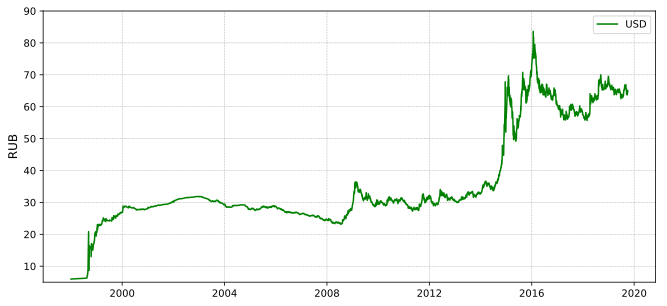

In [27]:
figure(figsize=(11,5))
plt.plot(currency['data'], curs, color='green', marker='', linestyle='-', markerfacecolor='blue', label = 'USD');
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(loc='best');

#Подписи для осей:
#plt.xlabel('year', fontsize=12)
plt.ylabel('RUB', fontsize=12);

# Градуировка осей
plt.yticks(range(10, 95, 10), fontsize=10);

#Диапазон осей:
plt.ylim(5, 90);
